In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

/Users/dries/dev/kul/thesis/algorithm-thesis


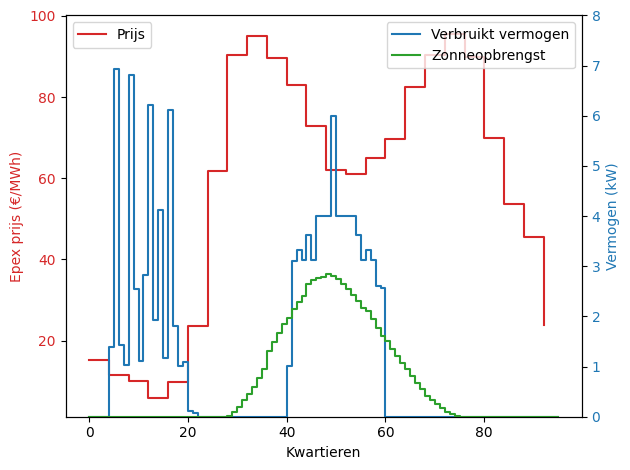

[1.1110000000235773, 2.830000000022202, 6.225000000028514, 1.9190000000150345, 4.122000000012067, 1.1800000000115385, 6.119000000007745, 1.8079999999324676, 1.0059999999762783, 1.0999999999765753]
[23.94, 45.53, 53.76, 69.96]


In [37]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Print current path
import os
print(os.getcwd())

# Step 1: Load the JSON data from a file
with open('src/main/resources/priceFiles/pricing.json', 'r') as file:
    data = json.load(file)

# Step 2: Extract time and price
# Calculating quarter index for each time (0-95)
quarter_indices = [
    int(item["Time"].split(":")[0]) * 4 + int(item["Time"].split(":")[1]) // 15
    for item in data
]
prices = [item["Price"] for item in data]

# Step 3: Load the power values from the CSV file
power_values = []
with open('output.csv', 'r') as file:  # Replace 'power_values.csv' with your file name
    power_values = list(map(float, file.read().strip().split(',')))

# Load the solar values from the CSV file
solar_values = pd.read_csv('src/main/resources/solarFiles/solar.csv', delimiter=';')
date_time = solar_values['DateTime']
production = solar_values['Production']

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Kwartieren')
ax1.set_ylabel('Epex prijs (€/MWh)', color=color)
ax1.step(quarter_indices, prices, color=color, where='pre')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Prijs'], loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Vermogen (kW)', color=color)
line1, = ax2.step(range(len(power_values)), power_values, color=color, where='post')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 8)

color = 'tab:green'
line2, = ax2.step(range(len(production)), production, color=color, where='post')

# Add legends for both lines
ax2.legend([line1, line2], ['Verbruikt vermogen', 'Zonneopbrengst'], loc='upper right')

plt.tight_layout()
plt.show()

print(power_values[10:20])
print(prices[0:4])

/Users/dries/dev/kul/thesis/algorithm-thesis


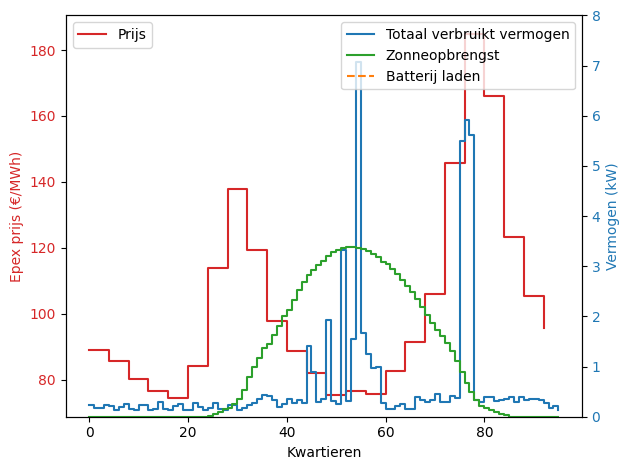

[0.242, 0.2240000000000002, 0.13999999999999968, 0.15200000000000014, 0.3019999999999996, 0.15200000000000014, 0.13999999999999968, 0.2060000000000004, 0.2599999999999998, 0.13999999999999968]
[95.72, 105.5, 123.13, 166.04]


In [92]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Print current path
import os
print(os.getcwd())

# Step 1: Load the JSON data from a file
with open('src/main/resources/priceFiles/2023-09-06_hilly.json', 'r') as file:
    data = json.load(file)

# Step 2: Extract time and price
# Calculating quarter index for each time (0-95)
quarter_indices = [
    int(item["Time"].split(":")[0]) * 4 + int(item["Time"].split(":")[1]) // 15
    for item in data
]
prices = [item["Price"] for item in data]

# Step 3: Load the power values from the CSV file
power_values = [] # 1st line of the file is the battery value
battery_values = [] # 2nd line of the file is the battery value
with open('output.csv', 'r') as file:
    lines = file.readlines()
    if len(lines) >= 1:
        power_values = list(map(float, lines[0].strip().split(',')))
    if len(lines) >= 2:
        battery_values = list(map(float, lines[1].strip().split(',')))

# Load the solar values from the CSV file
solar_values = pd.read_csv('src/main/resources/solarFiles/11_may_normalized.csv', delimiter=';')
date_time = solar_values['Datetime']
production = solar_values['Most recent forecast']

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Kwartieren')
ax1.set_ylabel('Epex prijs (€/MWh)', color=color)
ax1.step(quarter_indices, prices, color=color, where='pre')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Prijs'], loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Vermogen (kW)', color=color)
line1, = ax2.step(range(len(power_values)), power_values, color=color, where='post')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 8)

color = 'tab:green'
line2, = ax2.step(range(len(production)), production, color=color, where='post')

color = 'tab:orange'
line3, = ax2.step(range(len(battery_values)), battery_values, color=color, where='post', linestyle='--')

# Add legends for all lines
ax2.legend([line1, line2, line3], ['Totaal verbruikt vermogen', 'Zonneopbrengst', 'Batterij laden'], loc='upper right')

plt.tight_layout()
plt.show()

print(power_values[10:20])
print(prices[0:4])

/Users/dries/dev/kul/thesis/algorithm-thesis


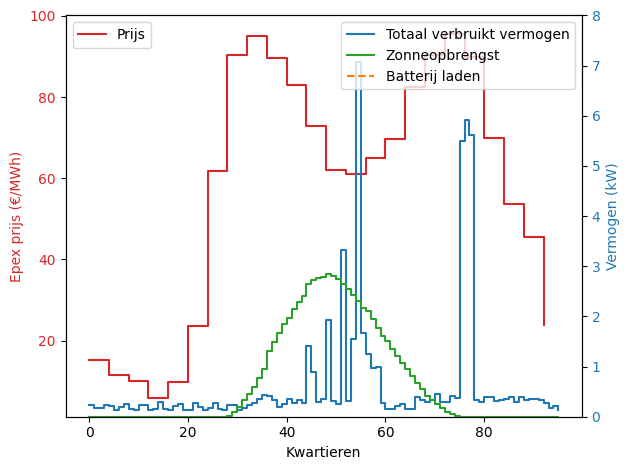

[0.242, 0.2240000000000002, 0.13999999999999968, 0.15200000000000014, 0.3019999999999996, 0.15200000000000014, 0.13999999999999968, 0.2060000000000004, 0.2599999999999998, 0.13999999999999968]
[23.94, 45.53, 53.76, 69.96]


In [93]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Print current path
import os
print(os.getcwd())

# Step 1: Load the JSON data from a file
with open('src/main/resources/priceFiles/pricing.json', 'r') as file:
    data = json.load(file)

# Step 2: Extract time and price
# Calculating quarter index for each time (0-95)
quarter_indices = [
    int(item["Time"].split(":")[0]) * 4 + int(item["Time"].split(":")[1]) // 15
    for item in data
]
prices = [item["Price"] for item in data]

# Step 3: Load the power values from the CSV file
power_values = [] # 1st line of the file is the battery value
battery_values = [] # 2nd line of the file is the battery value
with open('output.csv', 'r') as file:
    lines = file.readlines()
    if len(lines) >= 1:
        power_values = list(map(float, lines[0].strip().split(',')))
    if len(lines) >= 2:
        battery_values = list(map(float, lines[1].strip().split(',')))

# Load the solar values from the CSV file
solar_values = pd.read_csv('src/main/resources/solarFiles/solar.csv', delimiter=';')
date_time = solar_values['DateTime']
production = solar_values['Production']

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Kwartieren')
ax1.set_ylabel('Epex prijs (€/MWh)', color=color)
ax1.step(quarter_indices, prices, color=color, where='pre')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Prijs'], loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Vermogen (kW)', color=color)
line1, = ax2.step(range(len(power_values)), power_values, color=color, where='post')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 8)

color = 'tab:green'
line2, = ax2.step(range(len(production)), production, color=color, where='post')

color = 'tab:orange'
line3, = ax2.step(range(len(battery_values)), battery_values, color=color, where='post', linestyle='--')

# Add legends for all lines
ax2.legend([line1, line2, line3], ['Totaal verbruikt vermogen', 'Zonneopbrengst', 'Batterij laden'], loc='upper right')

plt.tight_layout()
plt.show()

print(power_values[10:20])
print(prices[0:4])